In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

Đọc file dữ liệu

In [18]:
df = pd.read_csv(r"D:\Đồ Án\TH1\code\train (1).csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df.shape

(1460, 81)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Kiểm tra và xử lý Outlier

LotFrontage - Number of outliers: 88


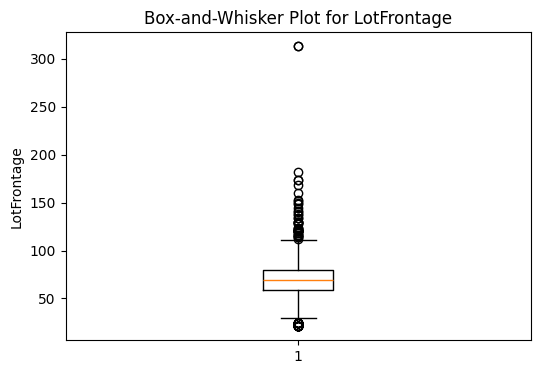

BsmtUnfSF - Number of outliers: 29


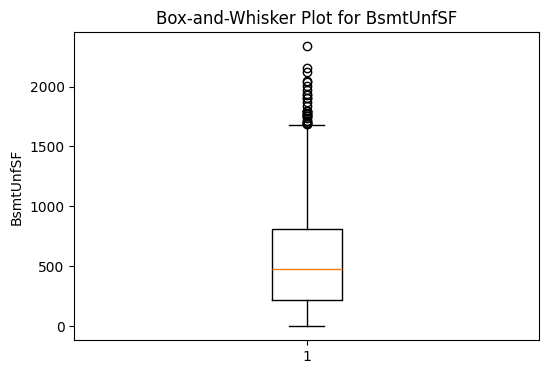

In [21]:
# Columns to analyze
columns = ['LotFrontage', 'BsmtUnfSF']

for col in columns:
    # Drop missing values
    data = df[col].dropna()

    # Compute IQR and outlier thresholds
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = data[(data < lower_fence) | (data > upper_fence)]

    # Print outlier summary
    # print(f"{col} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    # print(f"{col} - Lower fence: {lower_fence}, Upper fence: {upper_fence}")
    print(f"{col} - Number of outliers: {len(outliers)}")
    # print(f"Sample outliers:\n{outliers.head()}\n")

    # Plot box-and-whisker
    plt.figure(figsize=(6, 4))
    plt.boxplot(data, vert=True)
    plt.title(f'Box-and-Whisker Plot for {col}')
    plt.ylabel(col)
    plt.show()

In [22]:
import numpy as np

# Khởi tạo mask (True cho hàng "an toàn")
mask = np.ones(len(df), dtype=bool)

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Chỉ giữ True cho các giá trị trong ngưỡng
    mask &= df[col].between(lower_fence, upper_fence)

# DataFrame mới đã loại bỏ outliers
df = df[mask].reset_index(drop=True)

# Kích thước sau
df.shape


(1089, 81)

Tiền Xử lý dữ liệu

In [23]:
# 1. Load train và test (tên file như bạn đã upload)
train = pd.read_csv(r'D:\Đồ Án\TH1\code\train (1).csv')
test  = pd.read_csv(r'D:\Đồ Án\TH1\code\test (1).csv')

# 2. Nối hai DataFrame
df_combined = pd.concat([train, test], ignore_index=True)
print("Combined shape:", df_combined.shape)

# 3. Kiểm tra số cột có missing
missing_counts = df_combined.isnull().sum()
num_cols_missing = (missing_counts > 0).sum()
print("Number of columns with missing values:", num_cols_missing)

# # 4. Hiển thị chi tiết số missing theo cột
# missing_df = missing_counts[missing_counts > 0].reset_index()
# missing_df.columns = ['Column', 'MissingCount']
# print(missing_df)

# 5. Điền missing bằng 2 và lưu
df_fill2 = df_combined.fillna(2)
df_fill2.to_csv(r'D:\Đồ Án\TH1\code\combined_fill2.csv', index=False)
print("Missing after fillna(2):", df_fill2.isnull().sum().sum())

# 6. Điền missing bằng 0 và lưu
df_fill0 = df_combined.fillna(0)
df_fill0.to_csv(r'D:\Đồ Án\TH1\code\combined_fill0.csv', index=False)
print("Missing after fillna(0):", df_fill0.isnull().sum().sum())

Combined shape: (2919, 81)
Number of columns with missing values: 35
Missing after fillna(2): 0
Missing after fillna(0): 0


MasVnrArea - Number of outliers: 79



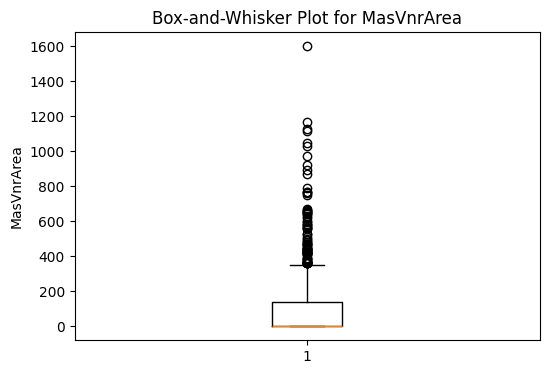

TotalBsmtSF - Number of outliers: 50



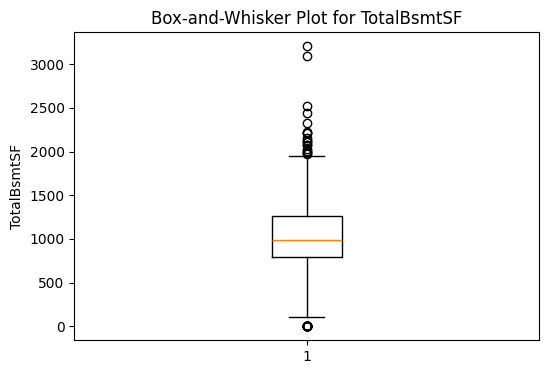

In [24]:
# Columns to visualize
columns = ['MasVnrArea', 'TotalBsmtSF']

for col in columns:
    data = df[col].dropna()
    
    # Compute IQR and fences
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = data[(data < lower_fence) | (data > upper_fence)]
    
    # # Print summary
    # print(f"{col} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    # print(f"{col} - Lower fence: {lower_fence}, Upper fence: {upper_fence}")
    print(f"{col} - Number of outliers: {len(outliers)}\n")
    
    # Plot box-and-whisker
    plt.figure(figsize=(6, 4))
    plt.boxplot(data, vert=True)
    plt.title(f'Box-and-Whisker Plot for {col}')
    plt.ylabel(col)
    plt.show()